In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
! curl "https://raw.githubusercontent.com/chendaniely/2016-pydata-carolinas-pandas/master/data/gapminder.tsv" -o gapminder.tsv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:05 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:06 --:--:--     0
 58 81932   58 48309    0     0   6901      0  0:00:11  0:00:07  0:00:04  9440
100 81932  100 81932    0     0  11704      0  0:00:07  0:00:07 --:--:-- 18174


In [4]:
df = pd.read_csv("gapminder.tsv",sep="\t")

In [5]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [6]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [7]:
df.shape

(1704, 6)

In [8]:
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [14]:
print(df.dtypes)

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object


In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
continent    1704 non-null object
year         1704 non-null int64
lifeExp      1704 non-null float64
pop          1704 non-null int64
gdpPercap    1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB
None


In [16]:
print(df.describe())

             year      lifeExp           pop      gdpPercap
count  1704.00000  1704.000000  1.704000e+03    1704.000000
mean   1979.50000    59.474439  2.960121e+07    7215.327081
std      17.26533    12.917107  1.061579e+08    9857.454543
min    1952.00000    23.599000  6.001100e+04     241.165877
25%    1965.75000    48.198000  2.793664e+06    1202.060309
50%    1979.50000    60.712500  7.023596e+06    3531.846989
75%    1993.25000    70.845500  1.958522e+07    9325.462346
max    2007.00000    82.603000  1.318683e+09  113523.132900


In [20]:
print(df.head())

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106


In [22]:
print(df["country"].tail())

1699    Zimbabwe
1700    Zimbabwe
1701    Zimbabwe
1702    Zimbabwe
1703    Zimbabwe
Name: country, dtype: object


In [23]:
# subset method
# loc : indexing by label index
# iloc : indexing by index
# ix : indexing by index or label

In [24]:
print(df.loc[1])

country      Afghanistan
continent           Asia
year                1957
lifeExp           30.332
pop              9240934
gdpPercap        820.853
Name: 1, dtype: object


In [26]:
print(df.index)

RangeIndex(start=0, stop=1704, step=1)


In [27]:
print(df.iloc[1])

country      Afghanistan
continent           Asia
year                1957
lifeExp           30.332
pop              9240934
gdpPercap        820.853
Name: 1, dtype: object


In [29]:
print(df.shape)

(1704, 6)


In [31]:
print("number row ",df.shape[0],"number columns :",df.shape[1],end="\n")

number row  1704 number columns : 6


In [33]:
print(df.loc[df.shape[0]-1])

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object


In [34]:
df.tail(n=1)

,country,continent,year,lifeExp,pop,gdpPercap
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [37]:
df.iloc[:,::].head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


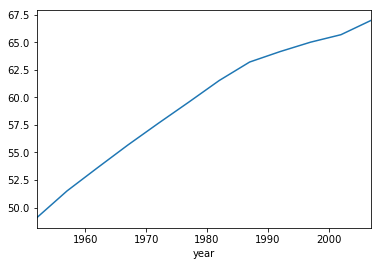

In [53]:
df.groupby(by="year",)["lifeExp"].mean().plot()

In [44]:
new_df=df.groupby(by=["year","continent"])["lifeExp","pop"].mean()

In [49]:
df.groupby(by="continent")["country"].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

,year,continent,lifeExp,pop
0,1952,Africa,39.135500,4.570010e+06
1,1952,Americas,53.279840,1.380610e+07
2,1952,Asia,46.314394,4.228356e+07
3,1952,Europe,64.408500,1.393736e+07
4,1952,Oceania,69.255000,5.343003e+06
5,1957,Africa,41.266346,5.093033e+06
6,1957,Americas,55.960280,1.547816e+07
7,1957,Asia,49.318544,4.735699e+07
8,1957,Europe,66.703067,1.459635e+07
9,1957,Oceania,70.295000,5.970988e+06


In [54]:
! curl "https://raw.githubusercontent.com/chendaniely/2016-pydata-carolinas-pandas/master/data/scientists.csv" -o scientists.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0
100   433  100   433    0     0    108      0  0:00:04  0:00:04 --:--:--   105
100   433  100   433    0     0    108      0  0:00:04  0:00:04 --:--:--   105


In [56]:
data = pd.read_csv("scientists.csv",delimiter=",")

In [59]:
data

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [64]:
data["Died"] = pd.to_datetime(data["Died"],format="%Y/%m/%d")

In [67]:
data.set_index(keys ="Died")

,Name,Born,Age,Occupation
Died,,,,
1958-04-16,Rosaline Franklin,1920-07-25,37,Chemist
1937-10-16,William Gosset,1876-06-13,61,Statistician
1910-08-13,Florence Nightingale,1820-05-12,90,Nurse
1934-07-04,Marie Curie,1867-11-07,66,Chemist
1964-04-14,Rachel Carson,1907-05-27,56,Biologist
1858-06-16,John Snow,1813-03-15,45,Physician
1954-06-07,Alan Turing,1912-06-23,41,Computer Scientist
1855-02-23,Johann Gauss,1777-04-30,77,Mathematician


In [69]:
from numpy import NAN,nan,NaN

In [72]:
pd.isnull(nan)

True

In [73]:
pd.notnull(nan)

False

In [74]:
data = pd.read_csv("survey_visited.csv")

In [75]:
data

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [78]:
data = pd.read_csv("survey_visited.csv",keep_default_na=False,na_values=[""])

In [79]:
data

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22
